# **## Titanic Dataset - Exploratory Data Analysis (EDA)**
**Objective of this Task**

Perform Exploratory Data Analysis (EDA) on the Titanic dataset to understand:
- Data structure and quality
- Distribution of categorical & numerical features
- Missing values and how to handle them
- Relationship between features and survival outcome
- Key insights & patterns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Show first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Load and Check Data
Here I check the structure, data types, and missing values in the dataset.

In [3]:
print('Dataset Shape:', df.shape)
df.info()
df.describe(include='all').T
df.isnull().sum()

Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 2. Variable Description
- **Survived** → Target variable (0 = No, 1 = Yes)
- **Pclass** → Ticket class (1st, 2nd, 3rd)
- **Sex** → Gender of passenger
- **Age** → Passenger age
- **SibSp** → Number of siblings/spouses aboard
- **Parch** → Number of parents/children aboard
- **Fare** → Ticket fare
- **Embarked** → Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **Cabin, Name, Ticket** → Extra identifiers (not directly useful for prediction)

## 3. Univariate Variable Analysis
I analyze categorical and numerical variables separately.

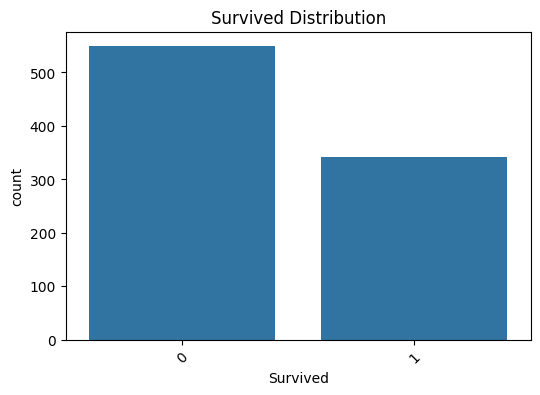

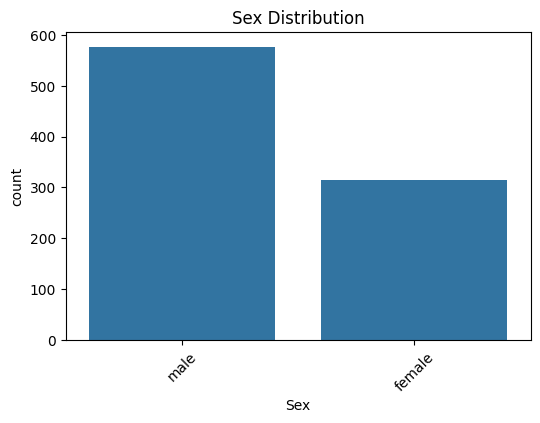

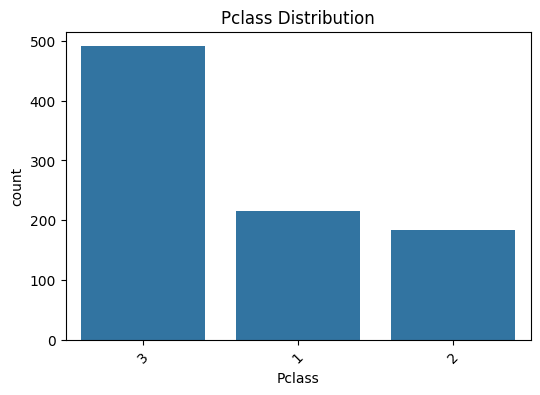

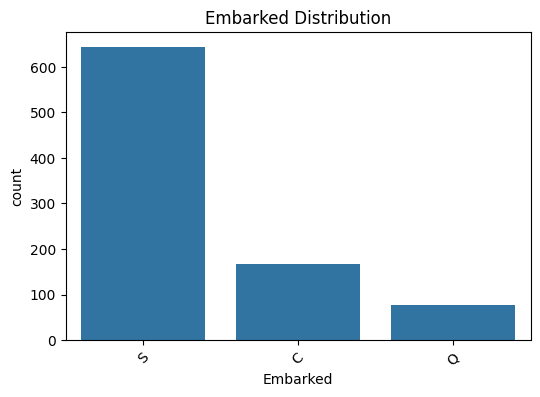

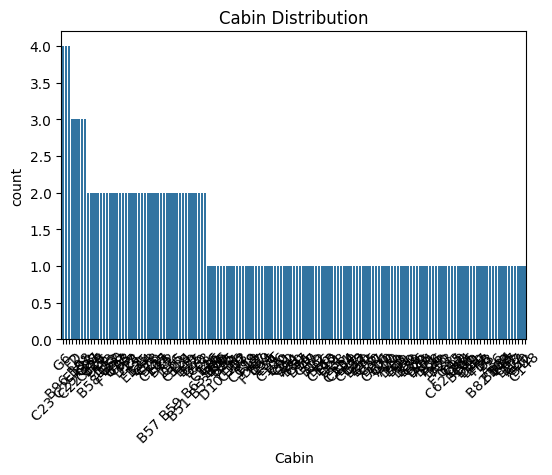

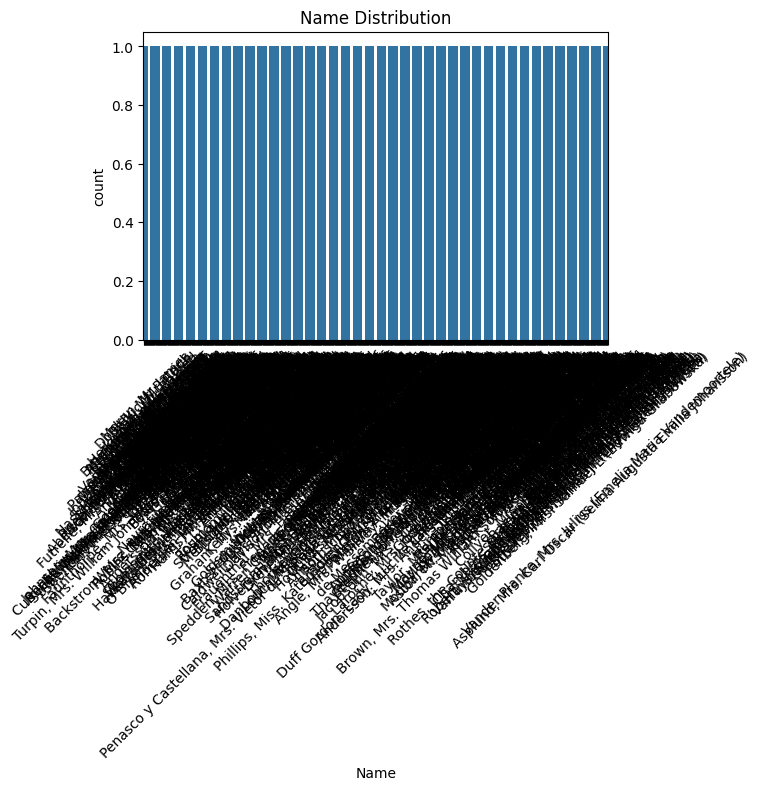

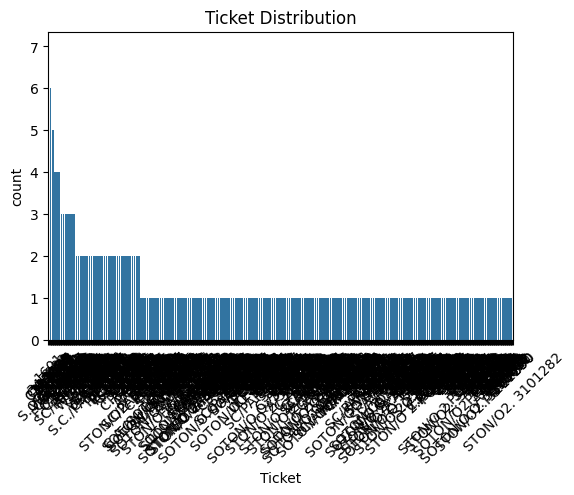

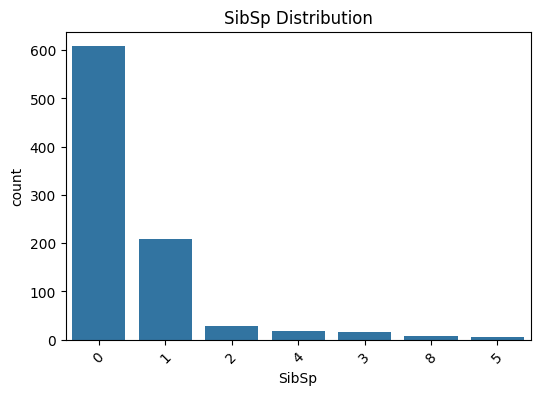

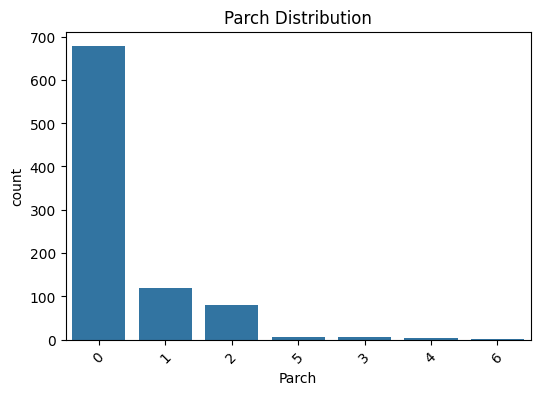

             Fare         Age  PassengerId
count  891.000000  714.000000   891.000000
mean    32.204208   29.699118   446.000000
std     49.693429   14.526497   257.353842
min      0.000000    0.420000     1.000000
25%      7.910400   20.125000   223.500000
50%     14.454200   28.000000   446.000000
75%     31.000000   38.000000   668.500000
max    512.329200   80.000000   891.000000


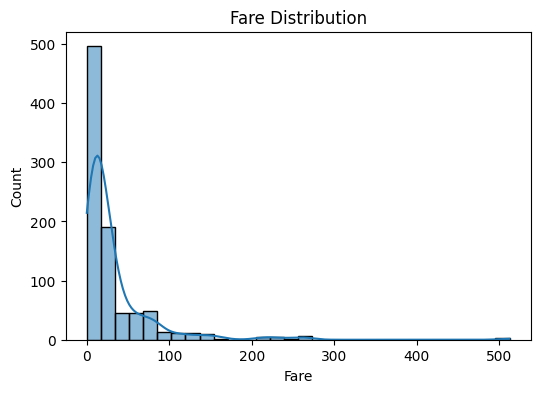

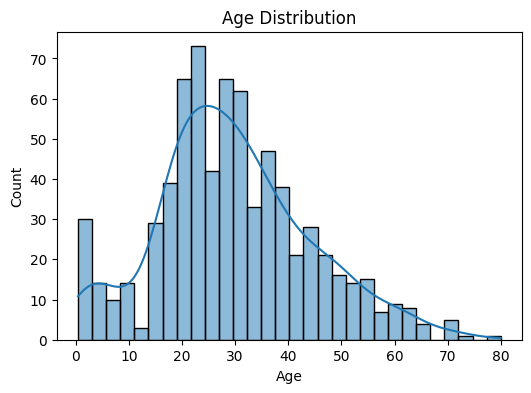

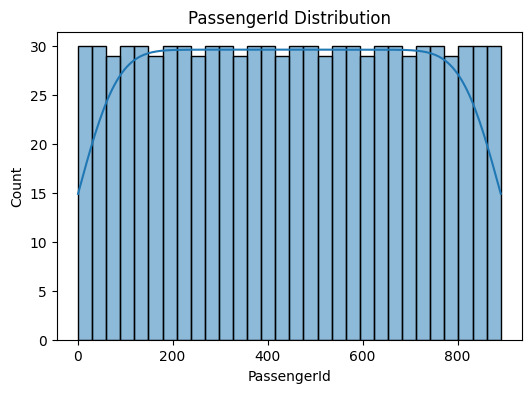

In [4]:
categorical_vars = ['Survived','Sex','Pclass','Embarked','Cabin','Name','Ticket','SibSp','Parch']
for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

numerical_vars = ['Fare','Age','PassengerId']
print(df[numerical_vars].describe())
for col in numerical_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

## 4. Basic Data Analysis
Check survival rate and distribution.

Survival Rate (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


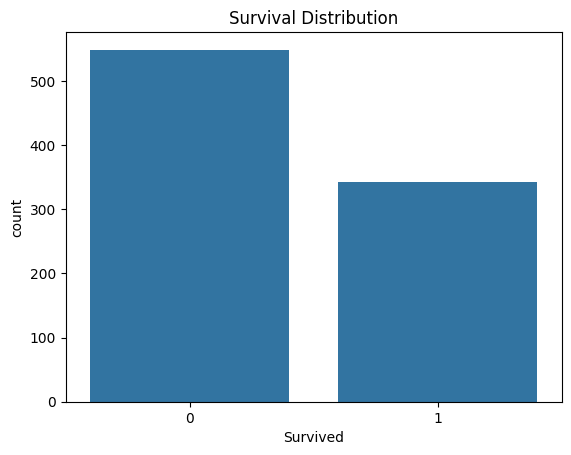

In [5]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print('Survival Rate (%):\n', survival_rate)
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

## 5. Outlier Detection
Boxplots help in detecting outliers in Age and Fare.

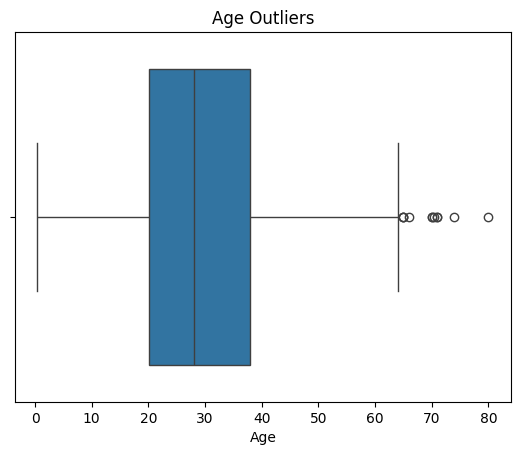

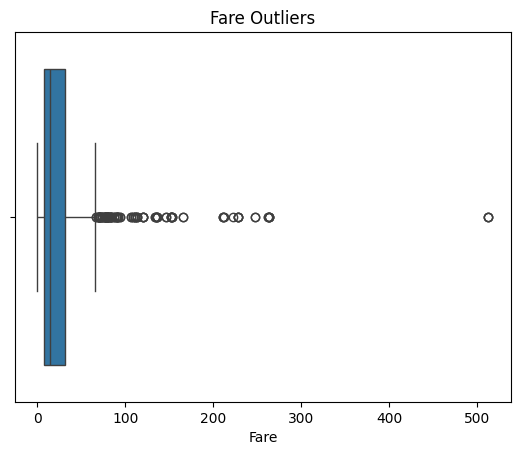

In [6]:
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()

## 6. Missing Values
I check and fill missing values using simple techniques.

In [7]:
df.isnull().sum()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop_duplicates(inplace=True)

/tmp/ipython-input-2214508427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2214508427.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## 7. Visualization of Feature Relationships
I explore how different features relate to survival.

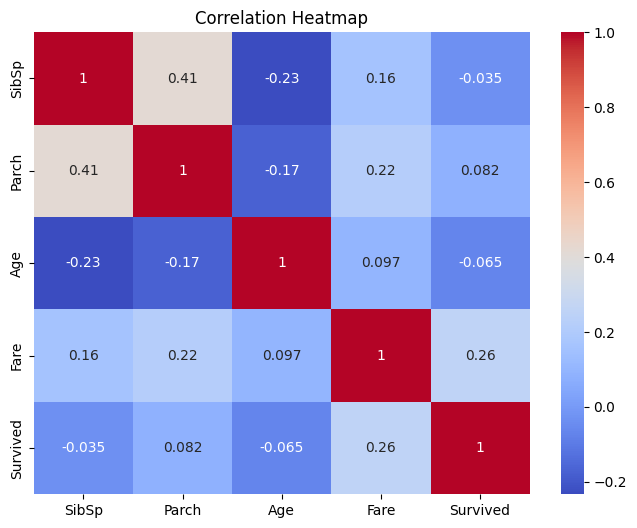

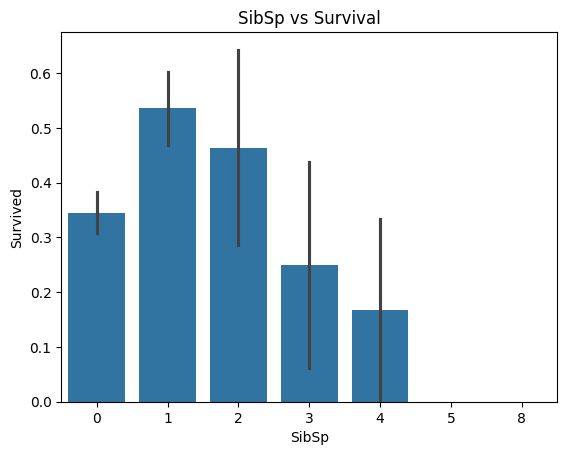

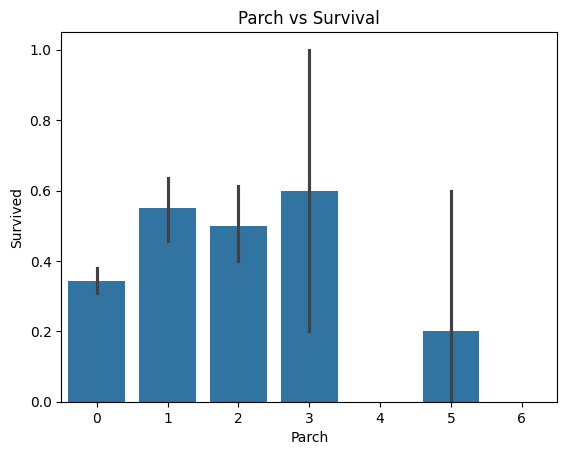

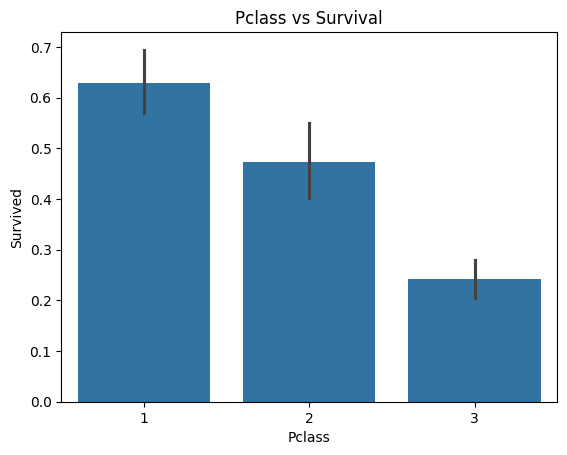

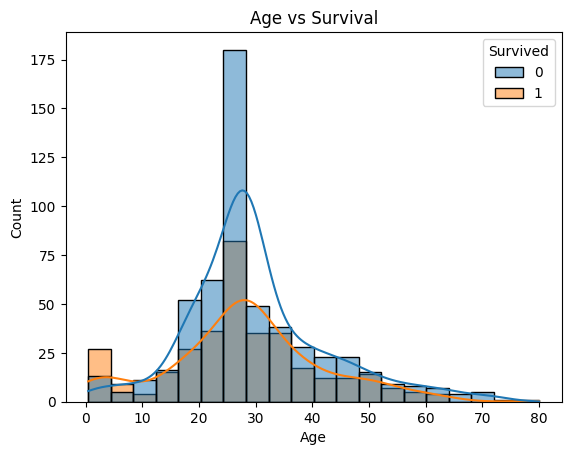

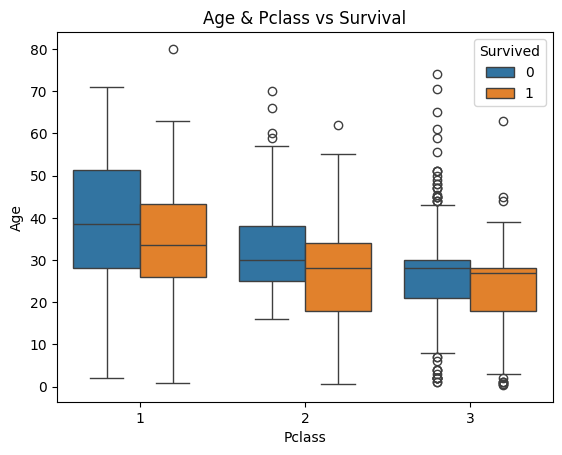

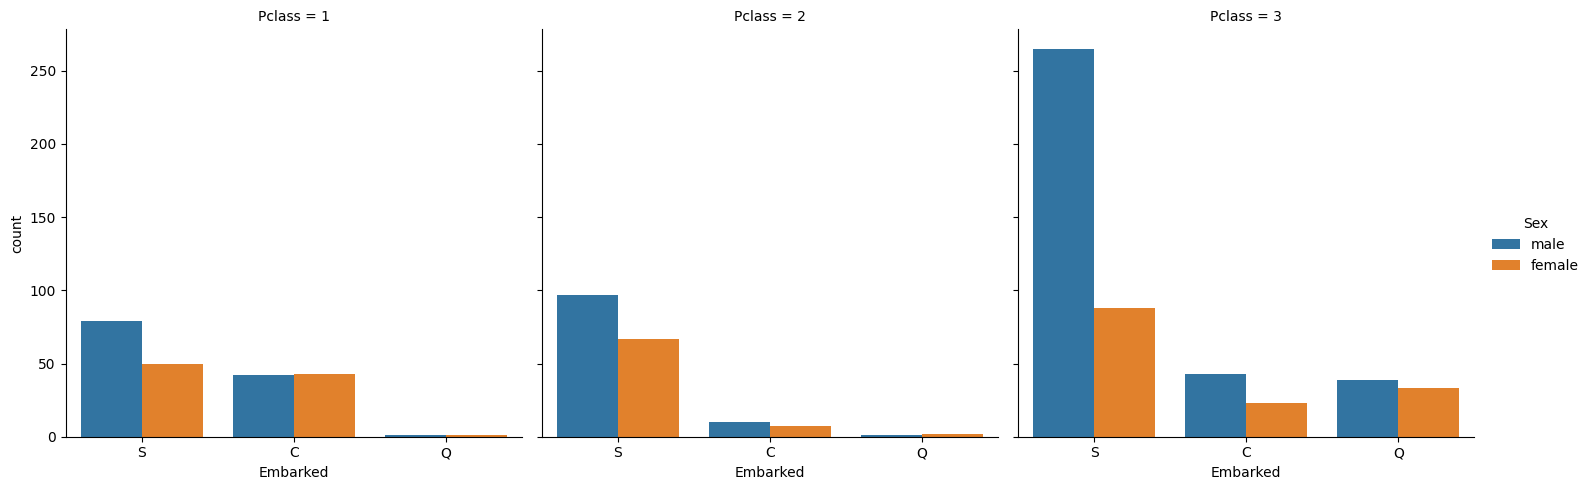

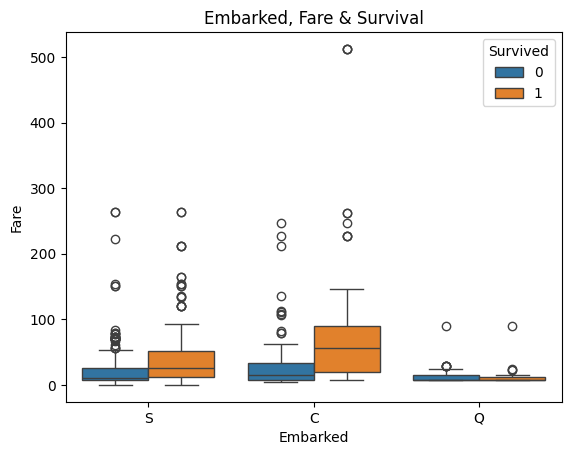

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['SibSp','Parch','Age','Fare','Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('SibSp vs Survival')
plt.show()

sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Parch vs Survival')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Pclass vs Survival')
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Age vs Survival')
plt.show()

sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age & Pclass vs Survival')
plt.show()

sns.catplot(x='Embarked', hue='Sex', col='Pclass', kind='count', data=df)
plt.show()

sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=df)
plt.title('Embarked, Fare & Survival')
plt.show()

## 8. Summary of Findings
1. Majority of passengers did not survive (class imbalance).
2. Females had a higher survival rate compared to males.
3. Higher ticket class (Pclass=1) passengers survived more than lower classes.
4. Younger passengers and families with 1–2 members had better chances of survival.
5. Fare was positively correlated with survival (higher fare → better survival chances).
6. Missing values mainly in Age, Cabin, and Embarked; Age & Embarked filled, Cabin dropped.